#Building a Binary Classification Model to detech Fake Social Media Account
## Lets Starting by import the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_excel("fake_account_dataset.xlsx")
df.tail(15)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
1185,1,0.000000,0.960175,0.000000,0,19.384719,0,1,133,281,1134,1,0.248458
1186,1,0.261636,0.914426,0.304843,0,0.000000,0,1,4,73,1287,1,0.057453
1187,1,0.000000,1.993654,0.000000,0,142.616458,1,0,161,100163,16,0,5892.000000
1188,0,0.264618,1.968561,0.000000,0,0.000000,0,0,0,38,65,1,0.590909
1189,1,0.320016,0.000000,0.000000,0,51.542555,0,1,4,850,619,1,1.372581
1190,1,0.573686,0.969091,0.000000,0,11.018795,0,0,0,58,72,1,0.808219
1191,1,0.000000,2.019406,0.000000,0,0.000000,0,0,1,62,136,1,0.459854
1192,1,0.000000,1.933735,0.000000,0,0.000000,0,1,19,526,530,0,0.992467
1193,1,0.216017,0.948534,0.231536,1,0.000000,0,1,3,45,658,1,0.069803
1194,1,0.000000,1.936574,0.000000,0,62.263575,0,0,23,220,263,0,0.837121


##Lets Know More About Our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           1200 non-null   int64  
 1   nums/length username  1200 non-null   float64
 2   fullname words        1200 non-null   float64
 3   nums/length fullname  1200 non-null   float64
 4   name==username        1200 non-null   int64  
 5   description length    1200 non-null   float64
 6   external URL          1200 non-null   int64  
 7   private               1200 non-null   int64  
 8   #posts                1200 non-null   int64  
 9   #followers            1200 non-null   int64  
 10  #follows              1200 non-null   int64  
 11  fake                  1200 non-null   int64  
 12  follow_ratio          1200 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 122.0 KB


In [ ]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,0.040059,0.040000,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,0.138720,0.196041,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,1.068951,1.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


In [ ]:
df.isnull().sum()


,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


## As we can See Here there is no null Value
### But we need to remove cols like "name==username" as it hardly matters
### And we can drop cols "nums/length fullname" as most of them are 0.0

In [ ]:
df = df.drop(["name==username","nums/length fullname"],axis =1)

In [ ]:
df.describe()

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


>From the Description we can see that 49% of the accounts in the data is fake meaning the data is split equally we can now shuffle the data for promising results
>We can Modify the data as per our needs in the future lets make our model and see how it works


##Now we have preprocessed our data to work on

###Lets Create X label and Y label

In [ ]:
Y = df["fake"]
df = df.drop(["fake"],axis = 1)

In [ ]:
Y

,fake
0,0
1,0
2,0
3,0
4,0
...,...
1195,0
1196,0
1197,1
1198,0


In [ ]:
X = df

In [ ]:
X

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,follow_ratio
0,1,0.270000,0.000000,53.000000,0,0,32,1000,955,1.047071
1,1,0.000000,2.000000,44.000000,0,0,286,2740,533,5.132959
2,1,0.100000,2.000000,0.000000,0,1,13,159,98,1.616162
3,1,0.000000,1.000000,82.000000,0,0,679,414,651,0.636503
4,1,0.000000,2.000000,0.000000,0,1,6,151,126,1.196850
...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000000,2.874912,0.000000,0,0,9,66,43,1.522727
1196,1,0.000000,0.000000,0.000000,0,1,135,890,1159,0.768103
1197,1,0.542466,0.973136,11.344382,0,0,0,57,69,0.828571
1198,1,0.000000,1.920877,63.459492,1,0,381,35842,1805,19.846622


In [ ]:
X = X.values
Y = Y.values
X,Y

(array([[1.00000000e+00, 2.70000000e-01, 0.00000000e+00, ...,
         1.00000000e+03, 9.55000000e+02, 1.04707113e+00],
        [1.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
         2.74000000e+03, 5.33000000e+02, 5.13295880e+00],
        [1.00000000e+00, 1.00000000e-01, 2.00000000e+00, ...,
         1.59000000e+02, 9.80000000e+01, 1.61616162e+00],
        ...,
        [1.00000000e+00, 5.42466143e-01, 9.73136224e-01, ...,
         5.70000000e+01, 6.90000000e+01, 8.28571429e-01],
        [1.00000000e+00, 0.00000000e+00, 1.92087701e+00, ...,
         3.58420000e+04, 1.80500000e+03, 1.98466224e+01],
        [1.00000000e+00, 0.00000000e+00, 1.05243133e+00, ...,
         1.08200000e+03, 9.58000000e+02, 1.12930136e+00]]),
 array([0, 0, 0, ..., 1, 0, 0]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train, y_train

(array([[1.00000000e+00, 5.50000000e-01, 1.00000000e+00, ...,
         7.90000000e+01, 7.67000000e+02, 1.04166667e-01],
        [0.00000000e+00, 3.80000000e-01, 1.00000000e+00, ...,
         1.20000000e+02, 1.81000000e+02, 6.64835165e-01],
        [1.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
         4.94000000e+02, 9.98000000e+02, 4.95495495e-01],
        ...,
        [1.00000000e+00, 3.10133632e-01, 1.01881239e+00, ...,
         2.20000000e+01, 3.80000000e+01, 5.89743590e-01],
        [1.00000000e+00, 1.25357625e-01, 2.10052299e+00, ...,
         2.95391000e+05, 2.55000000e+02, 1.15387500e+03],
        [0.00000000e+00, 0.00000000e+00, 9.17865364e-01, ...,
         4.90000000e+01, 6.00000000e+00, 7.14285714e+00]]),
 array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

###Using Standard Scaler i Am going to Scale the data from better performance and accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:2]

array([[ 0.62393179,  1.74954615, -0.44327214, -0.60808382, -0.35973847,
         1.34731187, -0.25227667, -0.10203144,  0.2207174 , -0.06556728],
       [-1.60273929,  0.97306011, -0.44327214, -0.60808382, -0.35973847,
        -0.74221865, -0.25227667, -0.10197744, -0.36497496, -0.06555694]])

In [ ]:
X_train[1]

array([-1.60273929,  0.97306011, -0.44327214, -0.60808382, -0.35973847,
       -0.74221865, -0.25227667, -0.10197744, -0.36497496, -0.06555694])

In [ ]:
X_test

array([[ 0.62393179, -0.76261456, -0.44103421, ..., -0.10154275,
        -0.24803638, -0.06554138],
       [-1.60273929,  1.82149998, -0.28979007, ..., -0.10212892,
        -0.53088781, -0.06556228],
       [ 0.62393179, -0.76261456, -1.35450159, ..., -0.10205779,
        -0.49090881, -0.06554944],
       ...,
       [-1.60273929,  0.33360103, -0.44327214, ..., -0.1020894 ,
        -0.50789989, -0.06555218],
       [ 0.62393179,  0.22405587, -0.4901691 , ..., -0.10207623,
         0.11177462, -0.06556791],
       [ 0.62393179, -0.76261456, -0.46811726, ...,  0.10286939,
         0.79841396, -0.06343671]])

###As I am Going to use tenserflow lets convert these to tensors

In [ ]:
X_train = tf.convert_to_tensor(X_train,dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test,dtype = tf.float32)

In [ ]:
X_train

<tf.Tensor: shape=(960, 10), dtype=float32, numpy=
array([[ 0.62393177,  1.7495462 , -0.44327214, ..., -0.10203145,
         0.2207174 , -0.06556728],
       [-1.6027393 ,  0.97306013, -0.44327214, ..., -0.10197744,
        -0.36497495, -0.06555694],
       [ 0.62393177, -0.76261455,  0.4679573 , ..., -0.10148479,
         0.45159614, -0.06556007],
       ...,
       [ 0.62393177,  0.6539409 , -0.42612973, ..., -0.10210653,
        -0.5078999 , -0.06555832],
       [ 0.62393177, -0.19003546,  0.5595568 , ...,  0.28696573,
        -0.2910138 , -0.04428829],
       [-1.6027393 , -0.76261455, -0.51811564, ..., -0.10207096,
        -0.5398831 , -0.06543747]], dtype=float32)>

In [ ]:
X_test.shape, X_train.shape

(TensorShape([240, 10]), TensorShape([960, 10]))

###As We can see here Train Data has 960 rows and Test Data has 240 rows Which is a beautiful split

##Lets Create Checkpoint to store the Best Model Epoch

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy","recall","precision","auc"])


In [ ]:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ["accuracy","recall","precision","auc"])

In [ ]:
history_1 = model_1.fit(X_train,y_train,epochs = 200,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8289 - auc: 0.8871 - loss: 0.5844 - precision: 0.8470 - recall: 0.8140 - val_accuracy: 0.8906 - val_auc: 0.9665 - val_loss: 0.2573 - val_precision: 0.9195 - val_recall: 0.8511
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8840 - auc: 0.9500 - loss: 0.2697 - precision: 0.9187 - recall: 0.8389 - val_accuracy: 0.9062 - val_auc: 0.9718 - val_loss: 0.2193 - val_precision: 0.9318 - val_recall: 0.8723
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8806 - auc: 0.9610 - loss: 0.2580 - precision: 0.9183 - recall: 0.8285 - val_accuracy: 0.8958 - val_auc: 0.9757 - val_loss: 0.2103 - val_precision: 0.9022 - val_recall: 0.8830
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9153 - auc: 0.9740 - loss: 0.2050 - precision: 0.9463 - recall: 0.8856 - val_accuracy: 0.8958 - val_auc: 0.9767 - val_loss: 0.2039 - val_precision: 0.9205 - val_recall: 0.8617
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━

In [ ]:
history_2 = model_2.fit(X_train,y_train,epochs = 200,validation_split=0.2,callbacks=[checkpoint],verbose=1)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5773 - auc: 0.8531 - loss: 0.6170 - precision: 0.5476 - recall: 0.9834 - val_accuracy: 0.8750 - val_auc: 0.9650 - val_loss: 0.4524 - val_precision: 0.8125 - val_recall: 0.9681
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - auc: 0.9140 - loss: 0.4683 - precision: 0.8420 - recall: 0.8683 - val_accuracy: 0.9062 - val_auc: 0.9372 - val_loss: 0.4334 - val_precision: 0.9222 - val_recall: 0.8830
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8931 - auc: 0.9107 - loss: 0.4658 - precision: 0.9167 - recall: 0.8450 - val_accuracy: 0.8802 - val_auc: 0.9403 - val_loss: 0.4257 - val_precision: 0.8660 - val_recall: 0.8936
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8830 - auc: 0.9123 - loss: 0.4363 - precision: 0.9235 - recall: 0.8295 - val_accuracy: 0.9010 - val_auc: 0.9309 - val_loss: 0.4148 - val_precision: 0.9518 - val_recall: 0.8404
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━

In [ ]:
best_model = tf.keras.models.load_model('best_model1.keras')
print(f" The Train Accuaracy of Model 1 is : \n{best_model.evaluate(X_train, y_train)}")
print()
print(f" The Validation Accuracy of Model 1 is : \n{best_model.evaluate(X_test, y_test)}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9813 - auc: 0.9988 - loss: 0.0450 - precision: 0.9913 - recall: 0.9712
 The Train Accuaracy of Model 1 is : 
[0.05297788232564926, 0.9802083373069763, 0.9704017043113708, 0.9892241358757019, 0.9976363182067871]

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9536 - auc: 0.9889 - loss: 0.1424 - precision: 0.9801 - recall: 0.9257
 The Validation Accuracy of Model 1 is : 
[0.13727743923664093, 0.9583333134651184, 0.9411764740943909, 0.9739130139350891, 0.990277111530304]


In [ ]:
best_model2 = tf.keras.models.load_model('best_model2.keras')
print(f" The Train Accuaracy of Model 1 is : \n{best_model2.evaluate(X_train, y_train)}")
print()
print(f" The Validation Accuracy of Model 1 is : \n{best_model2.evaluate(X_test, y_test)}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - auc: 0.9987 - loss: 0.0410 - precision: 0.9851 - recall: 0.9788
 The Train Accuaracy of Model 1 is : 
[0.05046387016773224, 0.9833333492279053, 0.9809725284576416, 0.9851379990577698, 0.9970089197158813]

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9602 - auc: 0.9836 - loss: 0.1458 - precision: 0.9607 - recall: 0.9589
 The Validation Accuracy of Model 1 is : 
[0.1403624266386032, 0.9624999761581421, 0.9663865566253662, 0.9583333134651184, 0.9847558736801147]


In [ ]:
y_pred1_prob = best_model.predict(X_test)
y_pred2_prob = best_model2.predict(X_test)

y_pred1 = (y_pred1_prob >= 0.5).astype(int)
y_pred2 = (y_pred2_prob >= 0.5).astype(int)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


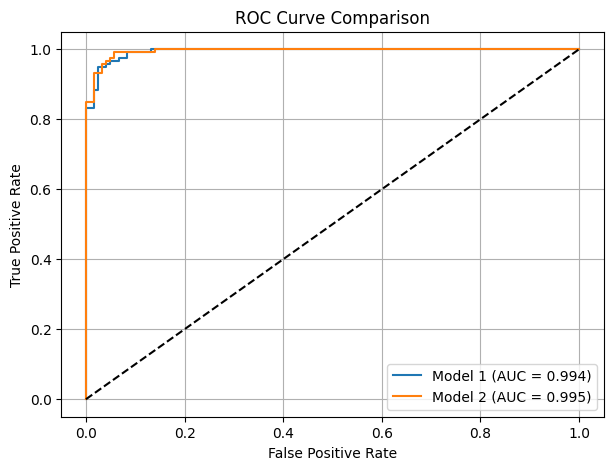

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test, y_pred1_prob)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2_prob)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(7,5))
plt.plot(fpr1, tpr1, label=f"Model 1 (AUC = {auc1:.3f})")
plt.plot(fpr2, tpr2, label=f"Model 2 (AUC = {auc2:.3f})")

plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


Classification Report for Model 1:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944000    0.973913  0.958333    0.958957      0.958832
recall       0.975207    0.941176  0.958333    0.958192      0.958333
f1-score     0.959350    0.957265  0.958333    0.958307      0.958316
support    121.000000  119.000000  0.958333  240.000000    240.000000

Classification Report for Model 2:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966667    0.958333    0.9625    0.962500      0.962535
recall       0.958678    0.966387    0.9625    0.962532      0.962500
f1-score     0.962656    0.962343    0.9625    0.962499      0.962501
support    121.000000  119.000000    0.9625  240.000000    240.000000



<Figure size 500x400 with 0 Axes>

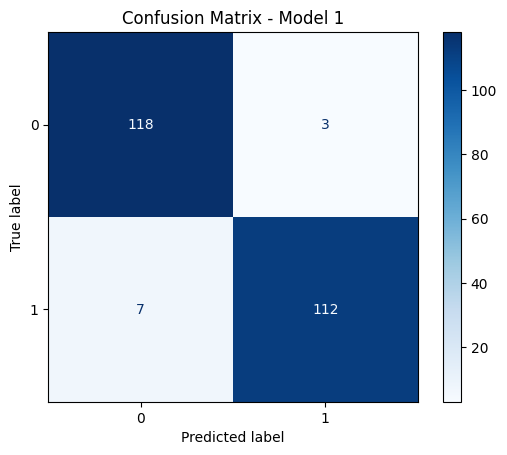

<Figure size 500x400 with 0 Axes>

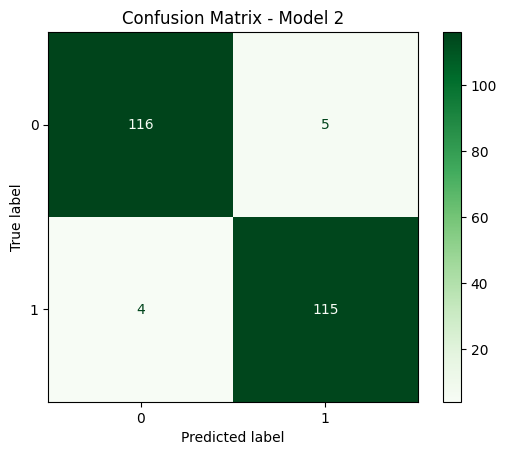

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Classification Report for Model 1:")
df_cr1 = pd.DataFrame(classification_report(y_test, y_pred1, output_dict=True))
print(df_cr1)

print("\nClassification Report for Model 2:")
df_cr2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict=True))
print(df_cr2)
print()
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm1).plot(cmap='Blues')
plt.title("Confusion Matrix - Model 1")
plt.show()

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm2).plot(cmap='Greens')
plt.title("Confusion Matrix - Model 2")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
best_model.save('/content/drive/MyDrive/best_model1.keras')
best_model2.save('/content/drive/MyDrive/best_model2.keras')